## Preprocessing

In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plot
import numpy as np

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

# Optimization 1 - increase number of bins in Application Type and Classification

In [7]:
# create new df's for optimization 1
application_df_1 = application_df.copy()

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df_1['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [11]:
# Optimization 1 - changed cutoff from <528 to <50


# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df_1['APPLICATION_TYPE'] = application_df_1['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df_1['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
application_df_1['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1

df_1 = application_df_1['CLASSIFICATION'].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(df_1[df_1['counts']>1])

   unique_values  counts
0          C1000   17326
1          C2000    6074
2          C1200    4837
3          C3000    1918
4          C2100    1883
5          C7000     777
6          C1700     287
7          C4000     194
8          C5000     116
9          C1270     114
10         C2700     104
11         C2800      95
12         C7100      75
13         C1300      58
14         C1280      50
15         C1230      36
16         C1400      34
17         C7200      32
18         C2300      32
19         C1240      30
20         C8000      20
21         C7120      18
22         C1500      16
23         C1800      15
24         C6000      15
25         C1250      14
26         C8200      11
27         C1238      10
28         C1278      10
29         C1235       9
30         C1237       9
31         C7210       7
32         C2400       6
33         C1720       6
34         C4100       6
35         C1257       5
36         C1600       5
37         C1260       3
38         C2710       3


In [14]:
# Optimization 1 - changed cutoff from <1823 to <50


# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace_1 = []

for ind in df_1.index:
    if (df_1['counts'][ind])<50:
        classifications_to_replace_1.append(df_1['unique_values'][ind]) 
        
print(classifications_to_replace_1)

['C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


In [17]:
# Replace in dataframe
for cls in classifications_to_replace_1:
    application_df_1['CLASSIFICATION'] = application_df_1['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_1['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: count, dtype: int64

In [18]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df_numeric_1 = pd.get_dummies(application_df_1, 
                            columns=['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION',
                                     'USE_CASE','ORGANIZATION','INCOME_AMT',
                                     'SPECIAL_CONSIDERATIONS'], dtype=int)

application_df_numeric_1.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
application_df_numeric_1.shape

(34299, 56)

In [31]:
# Split our preprocessed data into our features and target arrays
y1 = application_df_numeric_1['IS_SUCCESSFUL'].values
X1 = application_df_numeric_1.drop(columns='IS_SUCCESSFUL').values
print(X1.shape)


(34299, 55)


In [22]:
# Split the preprocessed data into a training and testing dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X1_scaler = scaler.fit(X1_train)

# Scale the data
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

##  Optimization 1- Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=55))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4480      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,941
Trainable params: 6,941
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn_1.fit(X1_train_scaled, y1_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 769us/step - loss: 0.5667 - accuracy: 0.7220
Epoch 2/100
804/804 [==============================] - 1s 754us/step - loss: 0.5529 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 1s 746us/step - loss: 0.5500 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 1s 787us/step - loss: 0.5478 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 1s 752us/step - loss: 0.5470 - accuracy: 0.7317
Epoch 6/100
804/804 [==============================] - 1s 784us/step - loss: 0.5454 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 753us/step - loss: 0.5443 - accuracy: 0.7299
Epoch 8/100
804/804 [==============================] - 1s 749us/step - loss: 0.5440 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 808us/step - loss: 0.5435 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 862us/step - l

804/804 [==============================] - 1s 854us/step - loss: 0.5302 - accuracy: 0.7425
Epoch 80/100
804/804 [==============================] - 1s 919us/step - loss: 0.5314 - accuracy: 0.7413
Epoch 81/100
804/804 [==============================] - 1s 839us/step - loss: 0.5299 - accuracy: 0.7425
Epoch 82/100
804/804 [==============================] - 1s 861us/step - loss: 0.5299 - accuracy: 0.7421
Epoch 83/100
804/804 [==============================] - 1s 911us/step - loss: 0.5297 - accuracy: 0.7426
Epoch 84/100
804/804 [==============================] - 1s 907us/step - loss: 0.5292 - accuracy: 0.7431
Epoch 85/100
804/804 [==============================] - 1s 815us/step - loss: 0.5299 - accuracy: 0.7419
Epoch 86/100
804/804 [==============================] - 1s 909us/step - loss: 0.5295 - accuracy: 0.7420
Epoch 87/100
804/804 [==============================] - 1s 868us/step - loss: 0.5297 - accuracy: 0.7417
Epoch 88/100
804/804 [==============================] - 1s 895us/step - loss:

In [27]:
# Evaluate the model using the test data
model1_loss, model1_accuracy = nn_1.evaluate(X1_test_scaled,y1_test,verbose=2)
print(f"Loss: {model1_loss}, Accuracy: {model1_accuracy}")

268/268 - 0s - loss: 0.5617 - accuracy: 0.7320 - 251ms/epoch - 936us/step
Loss: 0.5617328882217407, Accuracy: 0.7320116758346558


In [28]:
# Export our model to HDF5 file
nn_1.save("AlphabetSoupCharity_Optimization1.h5")

## model performances
original model: Loss: 0.564, Accuracy: 0.730

(1) binning change: 0.562, Accuracy: 0.732


# Optimization 2 - try more neurons in hidden layers

In [30]:
# create new df's for optimization 2
application_df_2 = application_df_1.copy()
application_df_numeric_2 = application_df_numeric_1.copy()

In [32]:
# Split our preprocessed data into our features and target arrays
y2 = application_df_numeric_2['IS_SUCCESSFUL'].values
X2 = application_df_numeric_2.drop(columns='IS_SUCCESSFUL').values
print(X2.shape)

(34299, 55)


In [36]:
# Split the preprocessed data into a training and testing dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X2_scaler = scaler.fit(X2_train)

# Scale the data
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [38]:
# Define the model - add more neurons
# first layer increased from 80 to 160
# second layer increased from 30 to 100

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=160, activation="relu", input_dim=55))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 160)               8960      
                                                                 
 dense_7 (Dense)             (None, 100)               16100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 25,161
Trainable params: 25,161
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_2.fit(X2_train_scaled, y2_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 957us/step - loss: 0.5690 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 921us/step - loss: 0.5536 - accuracy: 0.7290
Epoch 3/100
804/804 [==============================] - 1s 836us/step - loss: 0.5510 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 1s 846us/step - loss: 0.5491 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 1s 836us/step - loss: 0.5467 - accuracy: 0.7329
Epoch 6/100
804/804 [==============================] - 1s 843us/step - loss: 0.5457 - accuracy: 0.7342
Epoch 7/100
804/804 [==============================] - 1s 845us/step - loss: 0.5451 - accuracy: 0.7340
Epoch 8/100
804/804 [==============================] - 1s 856us/step - loss: 0.5441 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 834us/step - loss: 0.5428 - accuracy: 0.7346
Epoch 10/100
804/804 [==============================] - 1s 850us/step - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7413
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7423
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7415
Epoch 83/100
804/804 [==============================] - 1s 942us/step - loss: 0.5294 - accuracy: 0.7422
Epoch 84/100
804/804 [==============================] - 1s 940us/step - loss: 0.5287 - accuracy: 0.7420
Epoch 85/100
804/804 [==============================] - 1s 945us/step - loss: 0.5293 - accuracy: 0.7429
Epoch 86/100
804/804 [==============================] - 1s 929us/step - loss: 0.5287 - accuracy: 0.7423
Epoch 87/100
804/804 [==============================] - 1s 948us/step - loss: 0.5289 - accuracy: 0.7427
Epoch 88/100
804/804 [==============================] - 1s 944us/step - loss: 0.5283 - accuracy: 0.7419
Epoch 89/100
804/804 [==============================] - 1s 966us/step - loss: 0.529

In [40]:
# Evaluate the model using the test data
model2_loss, model2_accuracy = nn_2.evaluate(X2_test_scaled,y2_test,verbose=2)
print(f"Loss: {model2_loss}, Accuracy: {model2_accuracy}")

268/268 - 0s - loss: 0.5666 - accuracy: 0.7318 - 261ms/epoch - 974us/step
Loss: 0.5665808916091919, Accuracy: 0.7317784428596497


In [41]:
# Export our model to HDF5 file
nn_2.save("AlphabetSoupCharity_Optimization2.h5")

## model performances
original model: Loss: 0.564, Accuracy: 0.730

(1) binning change: 0.562, Accuracy: 0.732

(2) neuron addition:  Loss: 0.567, Accuracy: 0.732



# Optimization 3 - check for outliers and remove

In [42]:
# create new df's for optimization 3
application_df_3 = application_df_1.copy()


In [74]:
print(application_df_3.dtypes)
print('----------')
print(application_df_3.nunique())


APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object
----------
APPLICATION_TYPE            11
AFFILIATION                  6
CLASSIFICATION              16
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [69]:
application_df_3["STATUS"].value_counts()

STATUS
1    34294
0        5
Name: count, dtype: int64

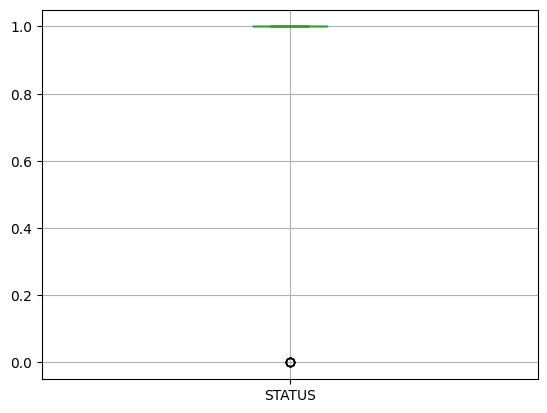

In [52]:
# Create plot box for numeric columns to look for outliers
# Status
b_plot_status = application_df_3.boxplot(column = ['STATUS']) 
b_plot_status.plot()
plot.show()


In [82]:
# Determine which data points are outside of the 1.5*IQR range

status = application_df_3['STATUS']

quartiles = np.quantile(status,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")

potential_outliers_status = [value for value in status if value < lower_bound or value > upper_bound]
potential_outliers_status

quartiles = [1. 1.] & IQR = 0.0


[0, 0, 0, 0, 0]

In [88]:
# Delete Rows with the outliers

df3 = application_df_3.drop(application_df_3[application_df_3["STATUS"] == 0 ].index)
df3["STATUS"].value_counts()


STATUS
1    34294
Name: count, dtype: int64

In [89]:
print(df3["ASK_AMT"].value_counts())


ASK_AMT
5000        25394
63981           3
15583           3
6725            3
10478           3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64


In [90]:
# Determine which data points are outside of the 1.5*IQR range for ASK_AMT

ask = df3['ASK_AMT']

quartiles = np.quantile(ask,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")
print(f'lower bound = {lower_bound} & upper bound = {upper_bound}')

potential_outliers_ask = [value for value in ask if value < lower_bound or value > upper_bound]
potential_outliers_ask

quartiles = [5000.   7745.25] & IQR = 2745.25
lower bound = 882.125 & upper bound = 11863.125


[108590,
 142590,
 31452,
 7508025,
 94389,
 69656,
 165593,
 86380556,
 376109,
 318296,
 44004,
 323466,
 709815,
 1329410,
 31613,
 1549352,
 577113,
 44623,
 64868,
 131620,
 306133,
 66916,
 236206,
 393704,
 9955466,
 94869,
 36607,
 484855,
 137272,
 101980,
 4410503,
 15477,
 24211,
 638229,
 20520,
 34879,
 205120,
 12829,
 452970,
 72961,
 12860,
 696502,
 259589,
 49112,
 86584,
 4108874,
 25175802,
 132449,
 73686,
 723426,
 521883,
 855350,
 370941,
 1728949,
 287332,
 1790960,
 23799,
 201655,
 27285052,
 74643,
 640921,
 2705244,
 2770474,
 61686,
 1064584,
 25736,
 17512616,
 39064,
 67654,
 139694,
 212362,
 87981,
 16027,
 1066994,
 107484,
 20380,
 293732,
 2471994,
 2793433,
 324268,
 343650,
 497726,
 28993,
 118358,
 2257305,
 64723,
 403069,
 329188,
 180240,
 47901,
 23322,
 102050,
 25846,
 10935786,
 1562336,
 281725,
 122937,
 12753,
 410463,
 38286,
 22527,
 47129,
 966422,
 718228,
 2461713,
 876484,
 14698,
 110885,
 64075,
 78769,
 2908673,
 216643,
 1622

In [91]:
# Delete Rows with the outliers
print(df3["ASK_AMT"].value_counts())
print('------------------')
df3a = df3.drop(df3[df3["ASK_AMT"] > 11863 ].index)
print(df3a["ASK_AMT"].value_counts())


ASK_AMT
5000        25394
63981           3
15583           3
6725            3
10478           3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64
------------------
ASK_AMT
5000     25394
10478        3
6725         3
6398         2
8632         2
         ...  
10684        1
10139        1
7756         1
9883         1
6713         1
Name: count, Length: 656, dtype: int64


In [103]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df_numeric_3 = pd.get_dummies(df3a, 
                            columns=['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION',
                                     'USE_CASE','ORGANIZATION','INCOME_AMT',
                                     'SPECIAL_CONSIDERATIONS'], dtype=int)

application_df_numeric_3.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [104]:
# Split our preprocessed data into our features and target arrays
y3 = application_df_numeric_3['IS_SUCCESSFUL'].values
X3 = application_df_numeric_3.drop(columns='IS_SUCCESSFUL').values
print(X3.shape)

(26088, 55)


In [105]:
# Split the preprocessed data into a training and testing dataset
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [106]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X3_scaler = scaler.fit(X3_train)

# Scale the data
X3_train_scaled = X3_scaler.transform(X3_train)
X3_test_scaled = X3_scaler.transform(X3_test)

In [107]:
# Define the model - outliers removed


nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=55))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                4480      
                                                                 
 dense_13 (Dense)            (None, 30)                2430      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,941
Trainable params: 6,941
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_3.fit(X3_train_scaled, y3_train, epochs=100)

Epoch 1/100
612/612 [==============================] - 1s 866us/step - loss: 0.5467 - accuracy: 0.7419
Epoch 2/100
612/612 [==============================] - 0s 759us/step - loss: 0.5305 - accuracy: 0.7486
Epoch 3/100
612/612 [==============================] - 0s 755us/step - loss: 0.5278 - accuracy: 0.7490
Epoch 4/100
612/612 [==============================] - 0s 749us/step - loss: 0.5256 - accuracy: 0.7509
Epoch 5/100
612/612 [==============================] - 0s 748us/step - loss: 0.5228 - accuracy: 0.7508
Epoch 6/100
612/612 [==============================] - 0s 748us/step - loss: 0.5226 - accuracy: 0.7531
Epoch 7/100
612/612 [==============================] - 0s 768us/step - loss: 0.5213 - accuracy: 0.7523
Epoch 8/100
612/612 [==============================] - 0s 791us/step - loss: 0.5214 - accuracy: 0.7505
Epoch 9/100
612/612 [==============================] - 1s 868us/step - loss: 0.5207 - accuracy: 0.7528
Epoch 10/100
612/612 [==============================] - 0s 760us/step - l

Epoch 80/100
612/612 [==============================] - 1s 873us/step - loss: 0.5103 - accuracy: 0.7589
Epoch 81/100
612/612 [==============================] - 1s 955us/step - loss: 0.5103 - accuracy: 0.7573
Epoch 82/100
612/612 [==============================] - 1s 897us/step - loss: 0.5099 - accuracy: 0.7580
Epoch 83/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.7578
Epoch 84/100
612/612 [==============================] - 1s 934us/step - loss: 0.5095 - accuracy: 0.7581
Epoch 85/100
612/612 [==============================] - 1s 869us/step - loss: 0.5096 - accuracy: 0.7585
Epoch 86/100
612/612 [==============================] - 1s 895us/step - loss: 0.5097 - accuracy: 0.7575
Epoch 87/100
612/612 [==============================] - 1s 835us/step - loss: 0.5104 - accuracy: 0.7584
Epoch 88/100
612/612 [==============================] - 1s 871us/step - loss: 0.5096 - accuracy: 0.7583
Epoch 89/100
612/612 [==============================] - 1s 965us/s

In [109]:
# Evaluate the model using the test data
model3_loss, model3_accuracy = nn_3.evaluate(X3_test_scaled,y3_test,verbose=2)
print(f"Loss: {model3_loss}, Accuracy: {model3_accuracy}")

204/204 - 0s - loss: 0.5524 - accuracy: 0.7444 - 178ms/epoch - 874us/step
Loss: 0.5524455904960632, Accuracy: 0.7444035410881042


In [110]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization3.h5")

## model performances
original model: Loss: 0.564, Accuracy: 0.730

(1) binning change: 0.562, Accuracy: 0.732

(2) neuron addition:  Loss: 0.567, Accuracy: 0.732

(3) remove outliers:  Loss: 0.552, Accuracy: 0.744



## Optimization 4 - use keras-tuner

In [111]:
# Import the kerastuner library

import keras_tuner as kt

In [112]:
# create new df's for optimization 3
application_df_4 = application_df_3.copy()
application_df_numeric_4 = application_df_numeric_3.copy()
application_df_numeric_4.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [114]:
# Split our preprocessed data into our features and target arrays
y4 = application_df_numeric_4['IS_SUCCESSFUL'].values
X4 = application_df_numeric_4.drop(columns='IS_SUCCESSFUL').values
print(X.shape)

(26088, 55)


In [117]:
# Split the preprocessed data into a training and testing dataset
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X4_scaler = scaler.fit(X4_train)

# Scale the data
X4_train_scaled = X4_scaler.transform(X4_train)
X4_test_scaled = X4_scaler.transform(X4_test)

In [124]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_4 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','elu'])
    optimizer = hp.Choice('optimizer',['SGD','Adam'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_4.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=80,
        step=5), activation=activation, input_dim=55))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_4.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=80,
            step=5),
            activation=activation))
    
    nn_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return nn_4


In [125]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [126]:
# Run the kerastuner search for best hyperparameters
tuner.search(X4_train_scaled,y4_train,epochs=50,validation_data=(X4_test_scaled,y4_test))

Trial 180 Complete [00h 00m 50s]
val_accuracy: 0.5234590768814087

Best val_accuracy So Far: 0.7490033507347107
Total elapsed time: 00h 36m 05s
INFO:tensorflow:Oracle triggered exit


In [127]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'optimizer': 'Adam',
 'first_units': 71,
 'num_layers': 3,
 'units_0': 11,
 'units_1': 41,
 'units_2': 51,
 'units_3': 56,
 'units_4': 61,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [129]:
best_model = tuner.get_best_models(1)[0]
model4_loss, model4_accuracy = best_model.evaluate(X4_test_scaled,y4_test,verbose=2)
print(f"Loss: {model4_loss}, Accuracy: {model4_accuracy}")

204/204 - 0s - loss: 0.5375 - accuracy: 0.7490 - 235ms/epoch - 1ms/step
Loss: 0.5375036597251892, Accuracy: 0.7490033507347107


In [130]:
# Export our model to HDF5 file
best_model.save("AlphabetSoupCharity_Optimization4.h5")

## model performances
original model: Loss: 0.564, Accuracy: 0.730

(1) binning change: 0.562, Accuracy: 0.732

(2) neuron addition:  Loss: 0.567, Accuracy: 0.732

(3) remove outliers:  Loss: 0.552, Accuracy: 0.744

(4) auto-tuner:  Loss: 0.538, Accuracy: 0.749

